In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Importing the Data

In [3]:
raw_csv_data = pd.read_csv('Datasets/IndexE8.csv')
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


#### Examining the Data

In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [7]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Plotting the Data

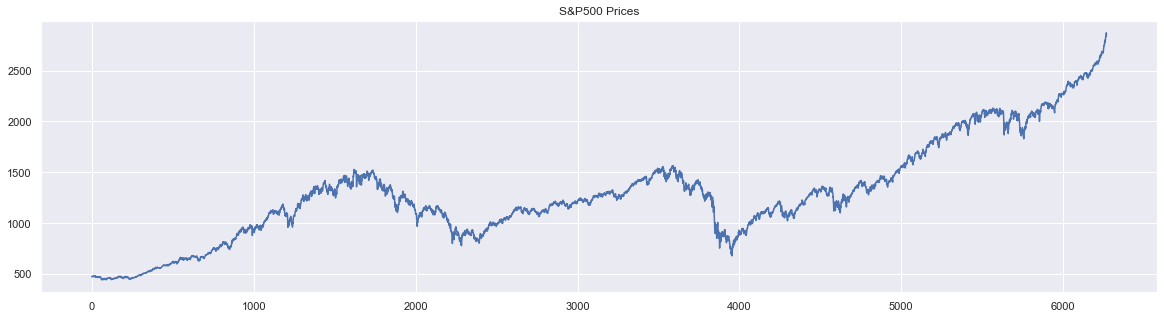

In [8]:
df_comp.spx.plot(figsize=(20, 5), title="S&P500 Prices")
plt.show()

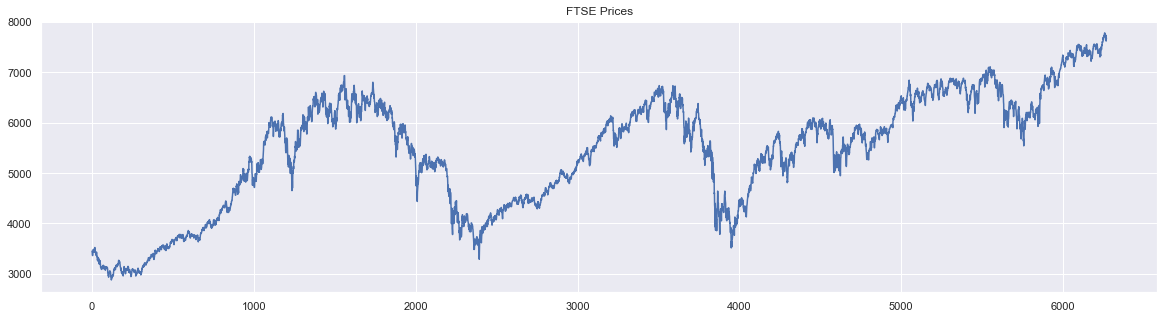

In [9]:
df_comp.ftse.plot(figsize=(20, 5), title="FTSE Prices")
plt.show()

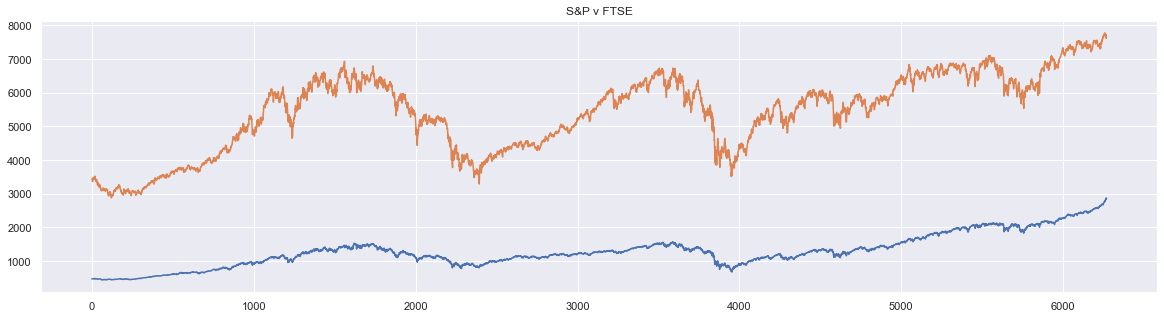

In [10]:
df_comp.spx.plot(figsize=(20, 5), title="S&P500 Prices")
df_comp.ftse.plot(figsize=(20, 5), title="FTSE Prices")
plt.title("S&P v FTSE")
plt.show()

### The QQ Plot

In [11]:
import scipy.stats
import pylab

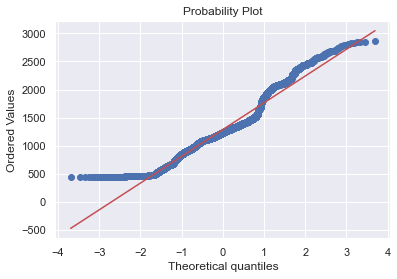

In [12]:
scipy.stats.probplot(df_comp.spx, plot=pylab)
plt.show()

### Length of the Time Period

In [13]:
df_comp.date.describe()

count           6269
unique          6269
top       17/07/1996
freq               1
Name: date, dtype: object

#### From Text to Date

In [14]:
df_comp.date = pd.to_datetime(df_comp['date'], dayfirst=True)

In [15]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [16]:
df_comp['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

#### Setting the Index

In [17]:
df_comp.set_index("date", inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Setting the Desired Frequency

In [18]:
df_comp = df_comp.asfreq('d')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


NOTE: We generated new periods, which do not have values associated with them.

NOTE: Another pecularity of our data is that, it represents the closing prices of financial indices, these prices can only be recorded during working days.

In [19]:
df_comp = df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Handling Missing Values

In [20]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [21]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [22]:
df_comp.spx = df_comp.spx.fillna(method="ffill")

In [23]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [24]:
df_comp.ftse = df_comp.ftse.fillna(method="bfill")

In [25]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [26]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [27]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [28]:
df_comp.nikkei = df_comp.nikkei.fillna(value = df_comp.nikkei.mean())

In [29]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Simplifying the Dataset - Analyzing How the S&P 500 Performs

In [30]:
df_comp['market_value'] = df_comp['spx']

In [31]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [32]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [33]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


#### Splitting the Data

NOTE: Time series data relies on keeping the chronological order of the values, So, We Can't Shuffle our Data.



#### Training Set
From the beginning up to some cut off point
#### Testing Set
From the cut off point until the end

In [34]:
size = int(len(df_comp)*0.8)

In [35]:
df = df_comp.iloc[:size]

In [36]:
df_test = df_comp.iloc[size:]

In [37]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [38]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


#### White Noise Data

In [39]:
wn = np.random.normal(loc = df['market_value'].mean(), scale=df['market_value'].std(), size=len(df))

In [40]:
df['wn'] = wn

In [41]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1089.339526
std,292.559287,293.670788
min,438.920000,133.454275
25%,914.620000,887.213155
50%,1144.650000,1088.705854
75%,1316.280729,1284.284241
max,1570.252238,2384.083451


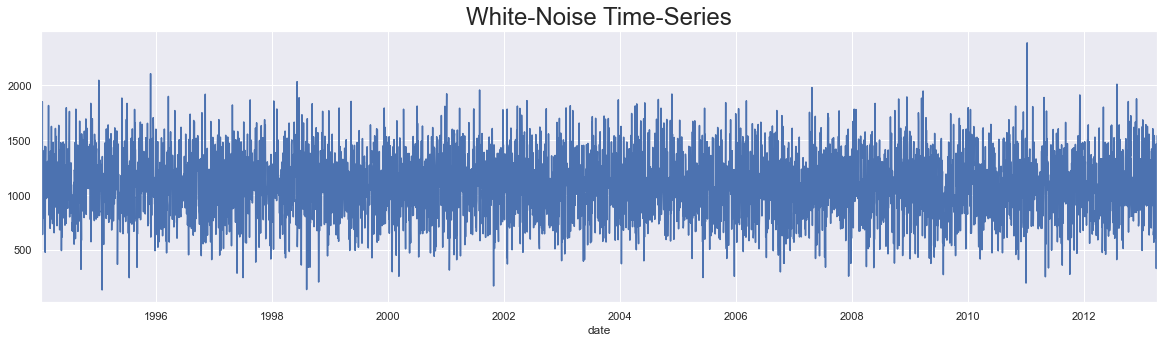

In [42]:
df.wn.plot(figsize=(20, 5))
plt.title("White-Noise Time-Series", size=24)
plt.show()

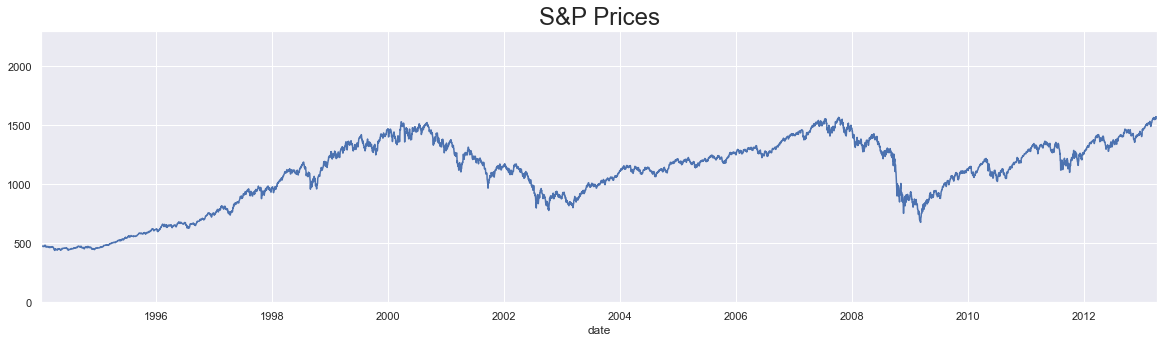

In [43]:
df.market_value.plot(figsize=(20, 5))
plt.title("S&P Prices", size=24)
plt.ylim(0,2300)
plt.show()

#### Random-Walk

In [44]:
rw = pd.read_csv('Datasets/RandWalk.csv')

In [45]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [46]:
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [47]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [48]:
df['rw'] = rw.price

In [49]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1483.602140,1122.139662
1994-01-10,475.27,1237.747574,1080.347860
1994-01-11,474.13,1454.820854,1082.095245
1994-01-12,474.17,694.372515,1083.639265
1994-01-13,472.47,918.995248,1067.146255


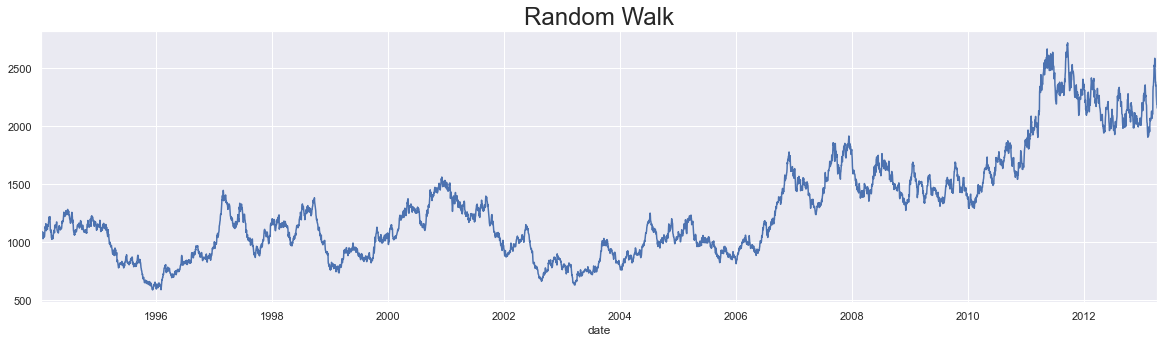

In [50]:
df.rw.plot(figsize = (20, 5))
plt.title("Random Walk", size=24)
plt.show()

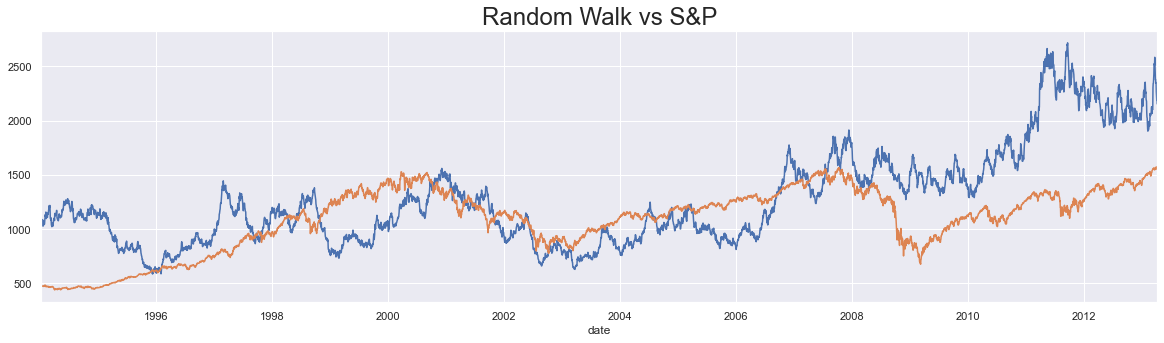

In [51]:
df.rw.plot(figsize = (20, 5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size=24)
plt.show()

#### Stationarity

In [52]:
import statsmodels.tsa.stattools as sts

In [53]:
sts.adfuller(df.market_value)

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [54]:
sts.adfuller(df.wn)

(-71.91773066705385,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70845.05918330976)

In [55]:
sts.adfuller(df.rw)

(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

 #### Seasonality

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

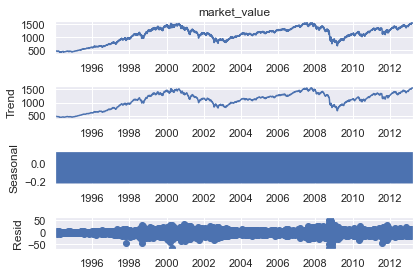

In [57]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()

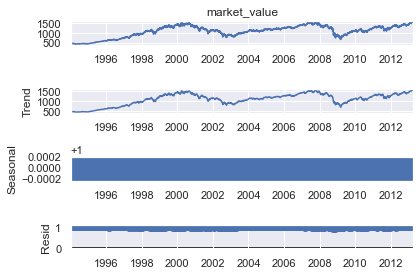

In [58]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

#### Autocorrelation

In [59]:
import statsmodels.graphics.tsaplots as sgt

### ACF

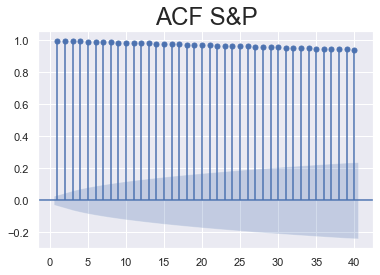

In [60]:
sgt.plot_acf(df.market_value, lags = 40, zero=False)
plt.title("ACF S&P", size=24)
plt.show()

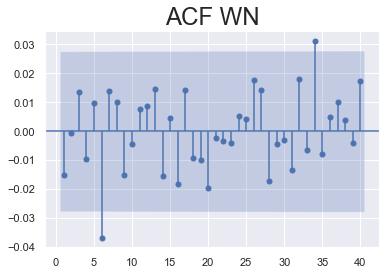

In [61]:
sgt.plot_acf(df.wn, lags = 40, zero=False)
plt.title("ACF WN", size=24)
plt.show()

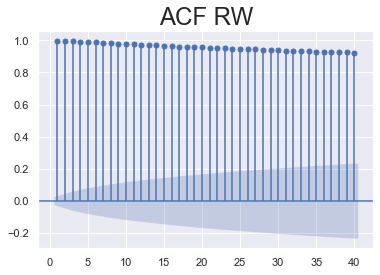

In [62]:
sgt.plot_acf(df.rw, lags = 40, zero=False)
plt.title("ACF RW", size=24)
plt.show()

#### PACF

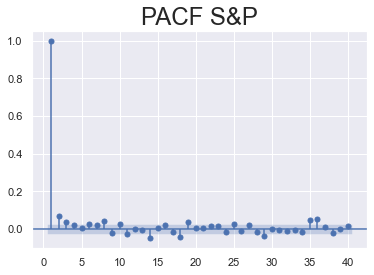

In [63]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method = ('ols'))
plt.title("PACF S&P", size=24)
plt.show()

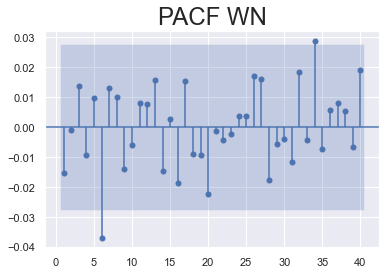

In [64]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method = ('ols'))
plt.title("PACF WN", size=24)
plt.show()

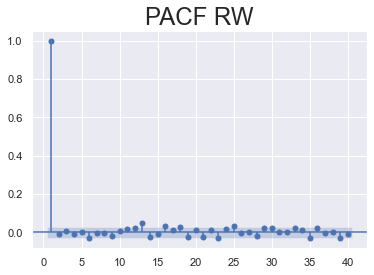

In [65]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method = ('ols'))
plt.title("PACF RW", size=24)
plt.show()